<a href="https://colab.research.google.com/github/Yejide123/Nigeria_2023_Sentiment-Analysis/blob/main/Project_SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUPPORT VECTOR MACHINE SENTIMENT ANALYSIS OF 2023 NIGERIA PRESIDENTIAL ELECTION

In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # set the style sheet use for plot
import re
import nltk
sns.set()
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Project_codes/train_labelled_data.csv" # access the labelled data from project folder
train_data = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
train_data

,Unnamed: 0,text,cleaned_text,scores,label
0,0,#OBI and #wife storm kastina state today.\n\nS...,wife storm kastina state todaysee crowd nigeri...,0.6249,positive
1,1,"If they can’t point to you one project , inves...",can ’ t point one project investment vision le...,0.2500,positive
2,2,@atiku God with his infinite mercy will never ...,god infinite mercy never allow emerge presiden...,-0.6874,negative
3,3,Governor @RotimiAkeredolu takes Asiwaju Bola A...,rotimiakeredolu take asiwaju bola ahmed tinubu...,0.0000,neutral
4,4,@atiku Salutation is not Love. #Obi is coming,salutation love obi come,0.6369,positive
...,...,...,...,...,...
74039,74559,I received with great sadness reports of the r...,receive great sadness report raze popular maid...,0.3818,positive
74040,74560,My deepest condolences to his family and the F...,deep condolence family fct pdp family may soul...,0.5423,positive
74041,74561,Hon Sunday Zaka truly embodied the Recovery sp...,sunday zaka truly embody recovery spirit pdp e...,0.5574,positive
74042,74562,I just exercised my right to vote. Let’s all d...,exercise right vote let ’ s part participate s...,0.3818,positive


In [ ]:
 # Divide the train data into independant (x) and depanadant  (y)
X = train_data['cleaned_text']
y = train_data['label']

USING SUPPORT VECTOR **MACHINE** **bold text**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape text data to be 2D
X_train_reshaped = np.array(X_train).reshape(-1, 1)
X_test_reshaped = np.array(X_test).reshape(-1, 1)

# Impute missing values
imputer = SimpleImputer(strategy='constant', fill_value='')
X_train_imputed = imputer.fit_transform(X_train_reshaped)
X_test_imputed = imputer.transform(X_test_reshaped)

# Convert text data into numerical feature vectors before applying SMOTE
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_imputed.flatten())  # Flatten back to 1D after imputation
X_test = vectorizer.transform(X_test_imputed.flatten())

# Apply SMOTE to balance the class distribution
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train an SVM classifier

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_resampled, y_train_resampled)



SVC(kernel='linear')

In [ ]:
#  run the model to predict the test data
predictions = svm_classifier.predict(X_test)

# Generate the classification report to evaluate the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.66      0.78      0.71      2389
     neutral       0.92      0.83      0.87      4723
    positive       0.92      0.92      0.92      5317

    accuracy                           0.86     12429
   macro avg       0.83      0.84      0.84     12429
weighted avg       0.87      0.86      0.86     12429





Human SVM Evaluation



In [ ]:
# Predict sentiment on sample data list for human evaluation
predictions = svm_classifier.predict(X_test)
new_text = ["Happy", "Sad", "Okay"]
new_features = vectorizer.transform(new_text)
new_predictions = svm_classifier.predict(new_features)
print(new_predictions)
SVM_Sample = pd.DataFrame(np.column_stack(new_predictions),
                               columns=new_text)
SVM_Sample


['positive' 'negative' 'positive']


,Happy,Sad,Okay
0,positive,negative,positive


Tinubu's data Sentiment Analysis

In [ ]:
path =  '/content/drive/MyDrive/Project_codes/Tinubu_cleaned_dataset.csv'
Tinubu_data = pd.read_csv(path) # read in Tinubu's processed data


Tinubu_data = Tinubu_data.replace(np.nan, '', regex=True)
Tinubu_text = Tinubu_data['cleaned_text'].tolist() # extra out and store the list of the cleaned data column

new_features = vectorizer.transform(Tinubu_text)
new_predictions = svm_classifier.predict(new_features) # Get the predicted sentiment
#new_predictions.to_csv('/content/drive/MyDrive/Project_codes/svm_output_tinubu.csv')

In [ ]:
Tinubu_data['Predict_label'] = new_predictions # store the generated list of sentiments and add to the original data

Tinubu_data

,Unnamed: 0,Tweet_Text,cleaned_text,Predict_label
0,0,"b'RT @kc_journalist: Elder Statesman, Tanko Ya...",elder statesman tanko yakassai drop bomb tinub...,negative
1,2,b'RT @novieverest: I have said it if APC had s...,say apc single dirt peter obi would easily use...,negative
2,6,"b""RT @DavidHundeyin: On election day, come out...",election day come large group tinubus hooligan...,negative
3,7,b'RT @KadunaResident: Peter Obi has taught Agb...,peter obi teach agbado tinubu show street cred...,positive
4,8,b'RT @PeterObi: Our most profound and heartfel...,profound heartfelt appreciation go people lago...,neutral
...,...,...,...,...
176623,2000217,"b""RT @usmanlade: Peter Obi Vs Asiwaju Rally in...",peter obi vs asiwaju rally kwara venue e didnt...,positive
176624,2000227,"b'Vote Peter obi of #LP for a new Nigeria, dem...",peter obi lp new nigeria democracy politics pe...,neutral
176625,2000232,b'@AdaAnambra2023 The words on the streets now...,word street fuel nd naira note scarcity plot s...,negative
176626,2000235,"b'RT @mrcow_enang: Las las, we will get sense ...",la las get sense force day presidential electi...,negative


In [ ]:
Tinubu_data['Predict_label'].value_counts() # sentiment counts

positive    92047
negative    47756
neutral     36825
Name: Predict_label, dtype: int64

<Axes: title={'center': 'TINUBU SVM SENTIMENT ANALYSIS'}>

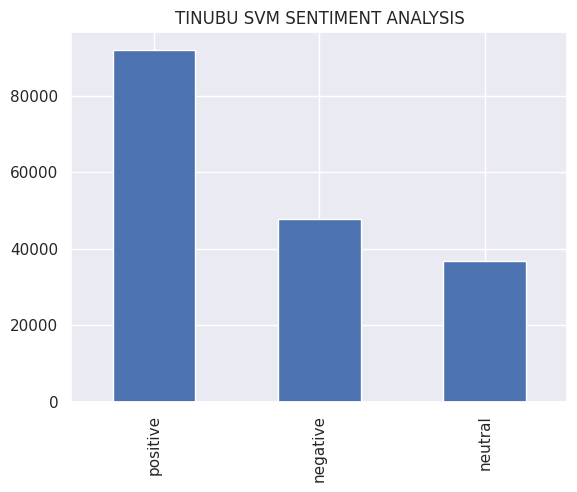

In [ ]:
Tinubu_data['Predict_label'].value_counts().plot(kind ='bar', title = 'TINUBU SVM SENTIMENT ANALYSIS') #plot the Tinubu's sentiment graph

In [ ]:
Tinubu_data.to_csv('/content/drive/MyDrive/Project_codes/svm_output_tinubu.csv') #  save to project file

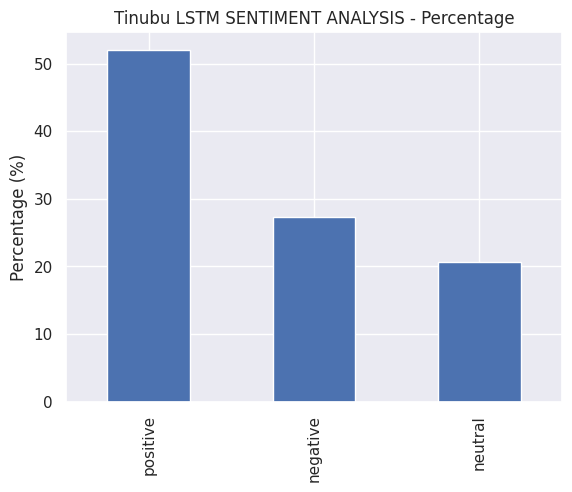

In [ ]:
import matplotlib.pyplot as plt


Tinubu_percentage_counts = (Tinubu_data['Predict_label'].value_counts(normalize=True) * 100).round(2)

# Plotting the sentiment percentage
Tinubu_percentage_counts.plot(kind='bar', title='Tinubu LSTM SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
Tinubu_percentage_counts

positive    52.03
negative    27.35
neutral     20.63
Name: Predict_label, dtype: float64

# OBI SVM SENTIMENT ANALYSIS

In [ ]:
path =  '/content/drive/MyDrive/Project_codes/Obi_cleaned_dataset.csv'
Obi_data = pd.read_csv(path) # Read in Obi's processed data from the project folder


Obi_data = Obi_data.replace(np.nan, '', regex=True)
Obi_text = Obi_data['cleaned_text'].tolist() # get the list of the cleaned text column and store in a variable

new_features = vectorizer.transform(Obi_text)
Obi_predictions = svm_classifier.predict(new_features) #generate Obi's sentiments



In [ ]:
Obi_data['Predict_label'] = Obi_predictions # add the sentiments to Obi original data

Obi_data

In [ ]:
Obi_data['Predict_label'].value_counts() #the Obi's sentiment count

positive    114830
negative     61849
neutral      46983
Name: Predict_label, dtype: int64

<Axes: title={'center': 'OBI SVM SENTIMENT ANALYSIS'}>

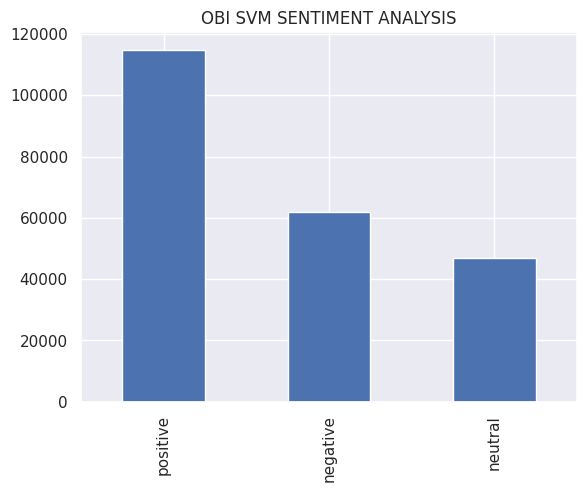

In [ ]:
Obi_data['Predict_label'].value_counts().plot(kind ='bar', title = 'OBI SVM SENTIMENT ANALYSIS') #plot the graph of the sentiments

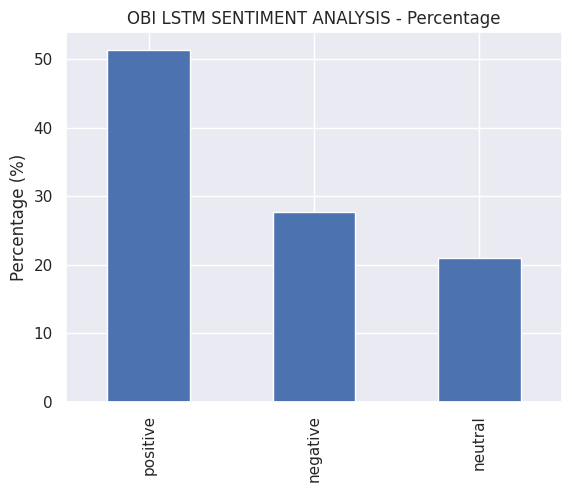

In [ ]:
import matplotlib.pyplot as plt


Obi_percentage_counts = (Obi_data['Predict_label'].value_counts(normalize=True) * 100).round(2)

# Plotting the percentage of the Obi's sentiment
Obi_percentage_counts.plot(kind='bar', title='OBI LSTM SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
Obi_percentage_counts


positive    51.34
negative    27.65
neutral     21.01
Name: Predict_label, dtype: float64

## ATIKU'S SVM SENTIMENT ANALYSIS

In [ ]:
path =  '/content/drive/MyDrive/Project_codes/Atiku_cleaned_dataset.csv'
Atiku_data = pd.read_csv(path) # access Atiku's processed data from the project file


Atiku_data = Atiku_data.replace(np.nan, '', regex=True)
Atiku_text = Atiku_data['cleaned_text'].tolist() # store the list of the Atiku's cleaned text column as a list

new_features = vectorizer.transform(Atiku_text)
Atiku_predictions = svm_classifier.predict(new_features) # apply the model to the Atiku's list of cleaned text to generate the sentiment

In [ ]:
Atiku_data['Predict_label'] = Atiku_predictions # create the predicted label column and add it to the original data

Atiku_data

,Unnamed: 0,Tweet_Text,cleaned_text,Predict_label
0,0,"b'RT @kc_journalist: Elder Statesman, Tanko Ya...",elder statesman tanko yakassai drop bomb tinub...,negative
1,38,b'RT @EstherOkokon3: @DailyPostNGR But you Kwa...,dailypostngr kwankwaso win without merge nah w...,positive
2,52,b'@asconambassador The first time vote out APC...,first time vote apc 2019 best time 2023 yoruba...,positive
3,60,b'RT @MimiUhiene: Atiku Won\xe2\x80\x99t Win B...,atiku wont win 22 apc governor 5 pdp governor ...,positive
4,95,b'RT @VictorIsrael_: Tinubu went to his campai...,tinubu go campaign rally insult peter obi danc...,negative
...,...,...,...,...
31849,1999957,b'No poll has projected APC to win the 2023 el...,poll project apc win 2023 election anap poll p...,positive
31850,1999990,"b'@atiku As The Wings Of The Unifier, #AtikuYo...",wing unifier atikuyouthwing tell fact bauchi s...,neutral
31851,2000016,"b""@HAHayatu North expecially core North has al...",north ecially core north always power hungry d...,positive
31852,2000065,b'#Trending: Inec to Postpone Election | Insec...,inec postpone election insecurity click watch ...,negative


In [ ]:
Atiku_data['Predict_label'].value_counts() # the count of the Atiku sentiments' category

positive    18311
neutral      7056
negative     6487
Name: Predict_label, dtype: int64

<Axes: title={'center': 'ATIKU SVM SENTIMENT ANALYSIS'}>

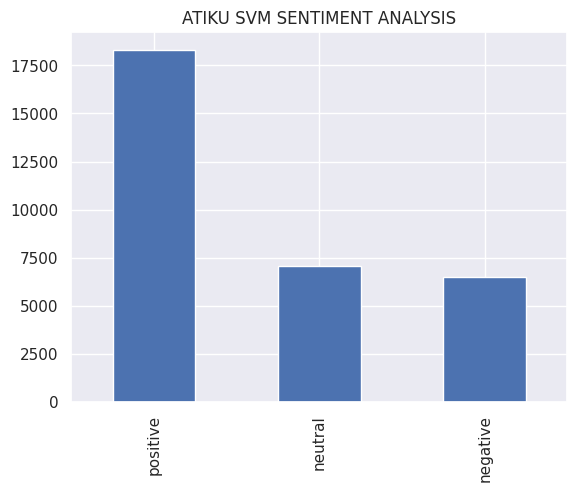

In [ ]:
Atiku_data['Predict_label'].value_counts().plot(kind ='bar', title = 'ATIKU SVM SENTIMENT ANALYSIS') #plot the sentiment graph

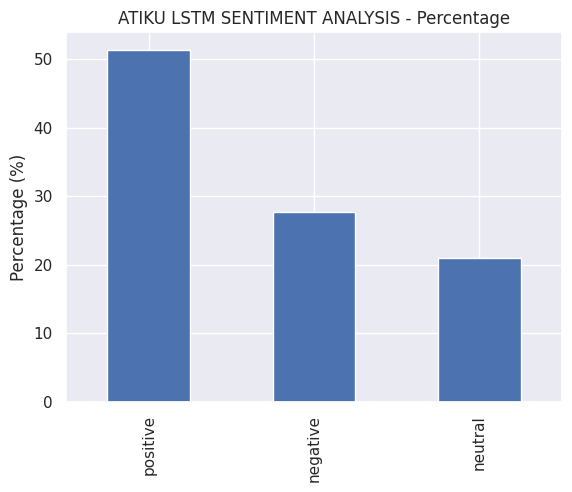

In [ ]:
import matplotlib.pyplot as plt


Atiku_percentage_counts = (Atiku_data['Predict_label'].value_counts(normalize=True) * 100).round(2)

# Plotting the Atiku percentages graph
Obi_percentage_counts.plot(kind='bar', title='ATIKU LSTM SENTIMENT ANALYSIS - Percentage')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
Atiku_percentage_counts

positive    57.48
neutral     22.15
negative    20.36
Name: Predict_label, dtype: float64

# **Comparative analysis of the three candidates**

In [ ]:
# Get Tinubu's data
Tinubu_predicted_count = Tinubu_data['Predict_label'].value_counts()
Tinubu_data['Predict_label'].value_counts()

positive    92047
negative    47756
neutral     36825
Name: Predict_label, dtype: int64

In [ ]:
# Get Obi's data
Obi_predicted_count = Obi_data['Predict_label'].value_counts()
Obi_data['Predict_label'].value_counts()

positive    114830
negative     61849
neutral      46983
Name: Predict_label, dtype: int64

In [ ]:
# Get Atiku's data
Atiku_predicted_count = Atiku_data['Predict_label'].value_counts()
Atiku_data['Predict_label'].value_counts()

positive    18311
neutral      7056
negative     6487
Name: Predict_label, dtype: int64

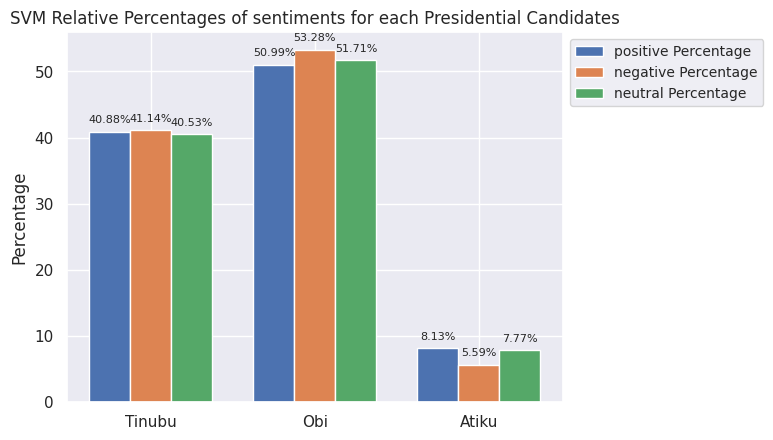

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# list of three names
labels = ['Tinubu', 'Obi', 'Atiku']
# list of the unqiue sentiments
categories = ['positive', 'negative', 'neutral']

# Counts for each category within each name
data = np.array([
    [Tinubu_predicted_count['positive'], Tinubu_predicted_count['negative'], Tinubu_predicted_count['neutral']],  # Tinubu
    [Obi_predicted_count['positive'], Obi_predicted_count['negative'], Obi_predicted_count['neutral']],  #Obi
    [Atiku_predicted_count['positive'], Atiku_predicted_count['negative'], Atiku_predicted_count['neutral']],  # Atiku
])

# Calculate overall counts for each category
overall_category_counts = np.sum(data, axis=0)

# Calculate relative percentages
relative_percentages = (data / overall_category_counts) * 100

# Plotting
fig, ax = plt.subplots()

# Plot stacked bar chart
bar_width = 0.25
bar_positions = np.arange(len(labels))

for i, category in enumerate(categories):
    ax.bar(bar_positions + i * bar_width, relative_percentages[:, i], width=bar_width, label=f'{category} Percentage')

# Modifying the bar abd legends labels
ax.set_ylabel('Percentage')
ax.set_title('SVM Relative Percentages of sentiments for each Presidential Candidates')
ax.set_xticks(bar_positions + (len(categories) - 1) * bar_width / 2)
ax.set_xticklabels(labels)
legend = ax.legend(fontsize='small', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to position the legend

# Display percentages on top of bars with reduced font size
for i, bar_position in enumerate(bar_positions):
    for j, category in enumerate(categories):
        yval = relative_percentages[i, j]
        ax.text(bar_position + j * bar_width, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)

plt.show()


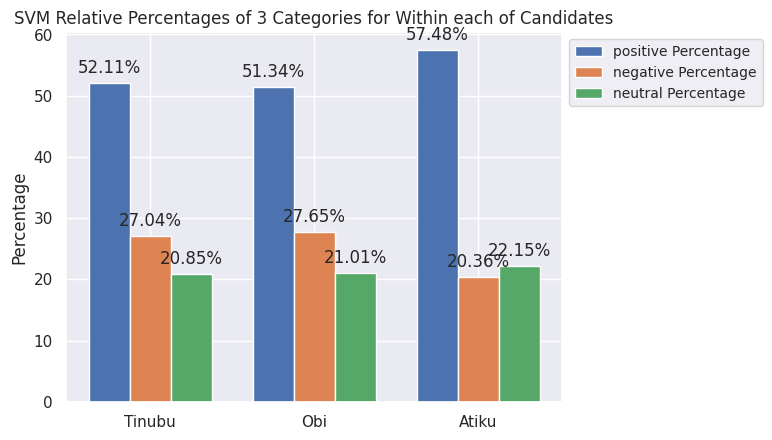

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# list of the 3 names
labels = ['Tinubu', 'Obi', 'Atiku']
# list of the unique category
categories = ['positive', 'negative', 'neutral']

# Percentages for each category within each name
data = np.array([
    [Tinubu_predicted_count['positive'], Tinubu_predicted_count['negative'], Tinubu_predicted_count['neutral']],  # Label 1
    [Obi_predicted_count['positive'], Obi_predicted_count['negative'], Obi_predicted_count['neutral']],  # Label 2
    [Atiku_predicted_count['positive'], Atiku_predicted_count['negative'], Atiku_predicted_count['neutral']],  # Label 3
])

# Calculate overall percentages for each name
overall_percentages = np.sum(data, axis=1)

# Normalize data to get relative percentages
normalized_data = (data.T / overall_percentages).T * 100

# Plotting
fig, ax = plt.subplots()

# Plot stacked bar chart
bar_width = 0.25
bar_positions = np.arange(len(labels))

for i, category in enumerate(categories):
    ax.bar(bar_positions + i * bar_width, normalized_data[:, i], width=bar_width, label=f'{category} Percentage')

# Adding labels
ax.set_ylabel('Percentage')
ax.set_title('SVM Relative Percentages of 3 Categories for Within each of Candidates')
ax.set_xticks(bar_positions + (len(categories) - 1) * bar_width / 2)
ax.set_xticklabels(labels)
legend = ax.legend(fontsize='small', bbox_to_anchor=(1, 1))  # Adjust bbox_to_anchor to position the legend

# Display percentages on top of bars
for i, bar_position in enumerate(bar_positions):
    for j, category in enumerate(categories):
        yval = normalized_data[i, j]
        ax.text(bar_position + j * bar_width, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()


